In [2]:
# importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# loading dataset
data = pd.read_csv('mail_data.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#checking if there are null values
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [5]:
# replacing null values with null string
mail_data = data.where(pd.notnull(data), '')

In [6]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
# checking the number of rows and columns
mail_data.shape

(5572, 2)

In [8]:
# checking id the target column is balanced
mail_data['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [9]:
# converting the target column values in  numbers
a = {'ham': 0,
     'spam': 1}

mail_data['Category'] = mail_data['Category'].map(a)
mail_data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# checking if the modification was correctly apllied
mail_data['Category'].value_counts()

Category
0    4825
1     747
Name: count, dtype: int64

In [11]:
# splitting the dataset in feature and target
X = mail_data['Message']
y = mail_data['Category']

In [12]:
# importing module and splitting the data in train and tes samples
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2, stratify=y)

In [15]:
# importing model for feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
# transform the text in feature vectors
extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_features = extraction.fit_transform(X_train)

X_test_features = extraction.transform(X_test)


In [27]:
# importing module and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# fitting and prediction the train dataset
model = LogisticRegression()
model.fit(X_train_features, y_train)
pred = model.predict(X_train_features)

# checking the metric for train dataset
acc = classification_report(y_train, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3859
           1       0.99      0.76      0.86       598

    accuracy                           0.97      4457
   macro avg       0.98      0.88      0.92      4457
weighted avg       0.97      0.97      0.97      4457



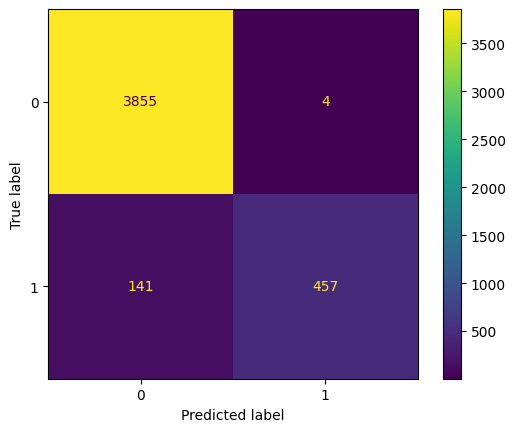

In [29]:
cm = confusion_matrix(y_train, pred)
dcm = ConfusionMatrixDisplay(cm)
dcm.plot()

In [25]:
# predicting the test dataset
pred_test = model.predict(X_test_features)

# checking the accuracy for test dataset
acc_test = classification_report(y_test, pred_test)
print(acc_test)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.70      0.83       149

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



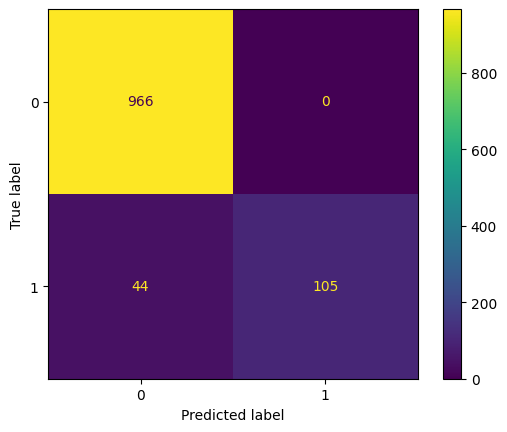

In [31]:
cm = confusion_matrix(y_test, pred_test)
dcm = ConfusionMatrixDisplay(cm)
dcm.plot()

### Prediction System

In [19]:
input_data = ["FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"]
input_data = extraction.transform(input_data)

prediction = model.predict(input_data)

if prediction == 0:
    print('The e-mail is not spam')
else:
    print('The e-mail is spam')

The e-mail is not spam
